# Credit Fraud Detection ( Quantum Inspired )

## Data Pre-processing 

Upload all the python modules necesarry 

In [19]:
import numpy as np
import pandas as pd 
import openjij
import pyqubo
import matplotlib.pyplot as plt


In [52]:
df = pd.read_csv('/Users/rag9704/Downloads/creditcard.csv')

In [53]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [54]:
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

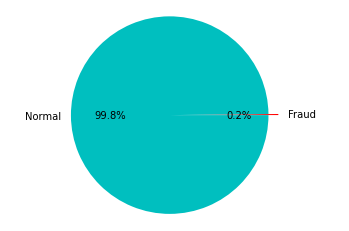

In [55]:
labels = 'Fraud', 'Normal'
sizes = [len(df[df.Class == 1]), len(df[df.Class==0])]
explode = (0.1, 0)
colors = ['r','c']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%3.1f%%', colors=colors)
ax.axis('equal')
plt.show()



As the dataset is imbalanced, containing only ~ 0.2 percent of fraud data, training our model on this data will create heavily biased result, we need to certainly increase the percentage of fraud cases in our overall dataset. 
This can be done using variety of techniques, currently we are using equalizing method.

In [56]:
not_fraud_df = df.loc[df['Class'] == 0][:492]
equalized_df = pd.concat([fraud_df, not_fraud_df])
equalized_df = equalized_df.sample(frac = 1, random_state = 42)
not_fraud_df = equalized_df[equalized_df['Class'] == 0]
fraud_df = equalized_df[equalized_df['Class'] == 1]

/var/folders/28/q22zwr5n7h7bph6_xyxlh77w0000gn/T/ipykernel_87557/2345857361.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sizes = [len(equalized_df[df.Class == 1]), len(equalized_df[df.Class==0])]


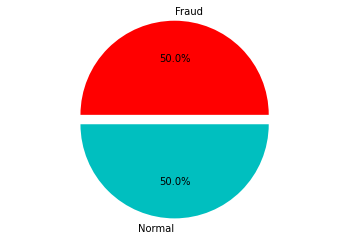

In [40]:
labels = 'Fraud', 'Normal'
sizes = [len(equalized_df[df.Class == 1]), len(equalized_df[df.Class==0])]
explode = (0.1, 0)
colors = ['r','c']
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%3.1f%%', colors=colors)
ax.axis('equal')
plt.show()


We have equalized the dataset, as you can see there's 50% of Fraud and 50% of non-Fraud dataset.

Now, we need to normalize the Time and Amount coloums, as other V1-V28 are already normalized 

In [57]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
training,test = train_test_split(equalized_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training, valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 

training_label = training.pop('Class')
test_label = test.pop('Class')
valid_label = valid.pop('Class')

In [45]:
training_label

386       0
89190     1
10498     1
72        0
36        0
         ..
154693    1
273       0
208651    1
462       0
83053     1
Name: Class, Length: 481, dtype: int64

## Using QBoost (Quantum Annealing Method)

QBoost is a one of the ensamble learning using QA. Ensamble learning involves preparing a number of weak predictors and combining the results of each of these predictors to obtain the final prediction result.
QBoost uses QA to optimize the best combination of learners for a given training data. We handle classification problem in this time.

In [92]:
# convert from label {0, 1} to {-1, 1}
training_label = (training_label-0.5) * 2
test_label = (test_label-0.5) * 2
valid_label = (valid_label-0.5) * 2

In [93]:
def aggre_mean(Y_list):
    return ((np.mean(Y_list, axis=0)>0)-0.5) * 2

In [94]:
training = training.to_numpy()
training_label = training_label.to_numpy()

## Set of Weak Learner 
We make weak learner with scikit-learn. In this time, we choose decision stump. Desision stump is a single-layer decision tree. As it will be used as a weak classifier, the features to be used for segmentation are selected randomly (it’s a good understanding that we execute single-layer of random forest).

In [95]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier as DTC

# set the number of weak classifier
num_clf = 32
# set the number of ensembles to be taken out for one sample in bootstrap sampling
sample_train = 40
# set model
models = [DTC(splitter="random",max_depth=1) for i in range(num_clf)]
for model in models:
    # extract randomly
    train_idx = np.random.choice(np.arange(training.shape[0]), sample_train)
    # make decision tree with variables
    model.fit(X=training[train_idx], y=training_label[train_idx])
y_pred_list_train = []
for model in models:
    # execute prediction with model
    y_pred_list_train.append(model.predict(training))
y_pred_list_train = np.asanyarray(y_pred_list_train)
y_pred_train =np.sign(y_pred_list_train)

In [96]:
from sklearn import metrics

#test = test.to_numpy()
y_test = test_label.to_numpy()
y_pred_list_test = []
for model in models:
    # execute with test data
    y_pred_list_test.append(model.predict(test))

y_pred_list_test = np.array(y_pred_list_test)
y_pred_test = np.sign(np.sum(y_pred_list_test,axis=0))
# compute score of prediction accuracy
acc_test_base = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
print(acc_test_base)

0.9425675675675675


/Users/rag9704/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/rag9704/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/rag9704/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/rag9704/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/rag9704/PycharmProjects/pythonProject/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier 

In [97]:
class QBoost():
    def __init__(self, y_train, ys_pred):
        self.num_clf = ys_pred.shape[0]
        # set binary variables
        self.Ws = Array.create("weight", shape = self.num_clf, vartype="BINARY")
        # set hyperparameter with PyQUBO Placeholder
        self.param_lamda = Placeholder("norm")
        # set combination of weak classifier Hamiltonian
        self.H_clf = sum( [ (1/self.num_clf * sum([W*C for W, C in zip(self.Ws, y_clf)])- y_true)**2 for y_true, y_clf in zip(y_train, ys_pred.T)
        ])
        # set normalization term as a constraint
        self.H_norm = Constraint(sum([W for W in self.Ws]), "norm")
        # set total Hamiltonian
        self.H = self.H_clf + self.H_norm * self.param_lamda
        # compile
        self.model = self.H.compile()
    # set function for converting to QUBO
    def to_qubo(self, norm_param=1):
        # set value of hyperparameter
        self.feed_dict = {'norm': norm_param}
        return self.model.to_qubo(feed_dict=self.feed_dict)

In [98]:
from pyqubo import Array, Constraint, Placeholder, solve_qubo
qboost = QBoost(y_train=training_label, ys_pred=y_pred_list_train)
# make QUBO with lambda=3
qubo = qboost.to_qubo(3)[0]

In [81]:
import openjij as oj
sampler = oj.SASampler(num_reads=10, num_sweeps=100)
    # solve with above sampler
response = sampler.sample_qubo(qubo)
    # extract raw data
raw_solution = dict(zip(response.indices, response.states[np.argmin(response.energies)]))
    # decode for easier analysis


In [99]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite


In [101]:
dw = DWaveSampler(endpoint='https://cloud.dwavesys.com/sapi/',
                  token='DEV-0dce3e196aef092073453f5648f9af252c0515d0',
                  solver='DW_2000Q_6')
# embed on chimeragraph
sampler = EmbeddingComposite(dw)

In [102]:
sampleset = sampler.sample_qubo(qubo, num_reads=100)
print(sampleset)


   weight[0] weight[10] weight[11] ... weight[9]      energy num_oc. ...
0          1          1          1 ...         1 -320.686523       6 ...
1          1          1          1 ...         1  -320.09375       1 ...
2          1          1          1 ...         1 -319.992188       1 ...
35         1          1          1 ...         1 -319.992188       1 ...
56         1          1          1 ...         1 -319.882812       1 ...
4          1          1          1 ...         0 -319.707031       1 ...
5          1          1          1 ...         1 -319.686523       2 ...
23         1          1          1 ...         1 -319.686523       1 ...
47         1          1          1 ...         0 -319.647461       1 ...
6          1          1          1 ...         1 -319.514648       3 ...
72         1          1          1 ...         0 -319.483398       1 ...
8          1          1          1 ...         1 -319.358398       1 ...
3          1          1          1 ...         1 -3

In [164]:
decoded_solutions = []
brokens = []
energies =[]

decoded_sol = qboost.model.decode_sampleset(sampleset, feed_dict=qboost.feed_dict)
best_sample = min(decoded_sol, key=lambda s: s.energy)
print(best_sample.energy)
print(best_sample.sample)
'''
for d_sol, broken, energy in decoded_sol:
    decoded_solutions.append(d_sol)
    brokens.append(broken)
    energies.append(energy)
'''

160.3134765625
{'weight[9]': 1, 'weight[7]': 0, 'weight[5]': 0, 'weight[3]': 1, 'weight[31]': 0, 'weight[2]': 1, 'weight[4]': 1, 'weight[1]': 1, 'weight[29]': 1, 'weight[27]': 1, 'weight[30]': 1, 'weight[26]': 1, 'weight[8]': 1, 'weight[24]': 1, 'weight[11]': 1, 'weight[23]': 1, 'weight[20]': 0, 'weight[28]': 1, 'weight[18]': 1, 'weight[0]': 1, 'weight[25]': 1, 'weight[17]': 1, 'weight[15]': 1, 'weight[22]': 1, 'weight[14]': 1, 'weight[12]': 1, 'weight[6]': 0, 'weight[19]': 1, 'weight[16]': 1, 'weight[21]': 1, 'weight[13]': 1, 'weight[10]': 1}


'\nfor d_sol, broken, energy in decoded_sol:\n    decoded_solutions.append(d_sol)\n    brokens.append(broken)\n    energies.append(energy)\n'

In [165]:
len(decoded_sol)

76

In [167]:
decoded_solutions = []
brokens = []
energies =[]
for i in range(len(decoded_sol)):
    decoded_solutions.append(decoded_sol[i].sample)
    
    energies.append(decoded_sol[i].energy)
 


In [170]:
decoded_solutions

[{'weight[9]': 1,
  'weight[7]': 0,
  'weight[5]': 0,
  'weight[3]': 1,
  'weight[31]': 0,
  'weight[2]': 1,
  'weight[4]': 1,
  'weight[1]': 1,
  'weight[29]': 1,
  'weight[27]': 1,
  'weight[30]': 1,
  'weight[26]': 1,
  'weight[8]': 1,
  'weight[24]': 1,
  'weight[11]': 1,
  'weight[23]': 1,
  'weight[20]': 0,
  'weight[28]': 1,
  'weight[18]': 1,
  'weight[0]': 1,
  'weight[25]': 1,
  'weight[17]': 1,
  'weight[15]': 1,
  'weight[22]': 1,
  'weight[14]': 1,
  'weight[12]': 1,
  'weight[6]': 0,
  'weight[19]': 1,
  'weight[16]': 1,
  'weight[21]': 1,
  'weight[13]': 1,
  'weight[10]': 1},
 {'weight[9]': 1,
  'weight[7]': 0,
  'weight[5]': 0,
  'weight[3]': 1,
  'weight[31]': 0,
  'weight[2]': 1,
  'weight[4]': 1,
  'weight[1]': 1,
  'weight[29]': 1,
  'weight[27]': 1,
  'weight[30]': 1,
  'weight[26]': 1,
  'weight[8]': 1,
  'weight[24]': 1,
  'weight[11]': 1,
  'weight[23]': 1,
  'weight[20]': 0,
  'weight[28]': 1,
  'weight[18]': 1,
  'weight[0]': 1,
  'weight[25]': 1,
  'weight[1

In [173]:
decoded_solutions[0]

{'weight[9]': 1,
 'weight[7]': 0,
 'weight[5]': 0,
 'weight[3]': 1,
 'weight[31]': 0,
 'weight[2]': 1,
 'weight[4]': 1,
 'weight[1]': 1,
 'weight[29]': 1,
 'weight[27]': 1,
 'weight[30]': 1,
 'weight[26]': 1,
 'weight[8]': 1,
 'weight[24]': 1,
 'weight[11]': 1,
 'weight[23]': 1,
 'weight[20]': 0,
 'weight[28]': 1,
 'weight[18]': 1,
 'weight[0]': 1,
 'weight[25]': 1,
 'weight[17]': 1,
 'weight[15]': 1,
 'weight[22]': 1,
 'weight[14]': 1,
 'weight[12]': 1,
 'weight[6]': 0,
 'weight[19]': 1,
 'weight[16]': 1,
 'weight[21]': 1,
 'weight[13]': 1,
 'weight[10]': 1}

In [169]:
# still remaining
accs_train_Dwaves = []
accs_test_Dwaves = []
for decoded_solution in decoded_solutions:
    idx_clf_DWave=[]
    for key, val in decoded_solution["weight"].items():
        if val == 1:
            idx_clf_DWave.append(int(key))
    y_pred_train_DWave = np.sign(np.sum(y_pred_list_train[idx_clf_DWave, :], axis=0))
    y_pred_test_DWave = np.sign(np.sum(y_pred_list_test[idx_clf_DWave, :], axis=0))
    acc_train_DWave = metrics.accuracy_score(y_true=test_label, y_pred=y_pred_train_DWave)
    acc_test_DWave= metrics.accuracy_score(y_true=test_label, y_pred=y_pred_test_DWave)
    accs_train_Dwaves.append(acc_train_DWave)
    accs_test_Dwaves.append(acc_test_DWave)

KeyError: 'weight'

## Variational Quantum Classofier (QAOA inspired)

Similar to classical supervised machine learning algorithms, the VQC has a training stage (where data points with labels are provided and learning takes place) and a testing stage (where new data points without labels are provided which are then classified).

The main steps of this algorithm are:

1. Load Data onto the Quantum Computer by Applying a Quantum Feature Map Φ(x)‍

2. Build and apply short-depth Variational Circuit W(θ).



### Implementing the Quantum Feature Map

A feature map is a variational circuit.

Some of the feature maps include:

 1) ZFeatureMap
 2) ZZFeatureMap
 3) PauliFeatureMap

These are the feature maps present in Qiskit. However, these feature maps may not perform well on all datasets. For a particular dataset, finding a quantum feature map that can spread the data points in Hilbert space in such a way that a hyperplane can be drawn to classify them is important to gain higher accuracies for our model(this is the basics of support vector machines).

We also want that the corresponding quantum feature map circuit is shallow( have a small circuit depth) as this reduces quantum decoherence, leading to higher accuracies.

### Appending a Variational Circuit
In this step we will append a variational circuit to the feature map. The parameters of this variational circuit are  trained using classical optimizers until it classifies the data points correctly. This is the training stage of the algorithm and accuracy of the model depends on the variational circuit one chooses.

### Performing the Classification Task

In [2]:
from copy import deepcopy
from typing import Dict, List, Tuple
import numpy as np
from sklearn import preprocessing


In [3]:
def features_and_labels_transform(
    dataset: Dict[str, np.ndarray], class_labels: List[str], one_hot: bool = True
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts a dataset into arrays of features and labels.

    Args:
        dataset: A dictionary in the format of {'A': numpy.ndarray, 'B': numpy.ndarray, ...}
        class_labels: A list of classes in the dataset
        one_hot (bool): if True - return one-hot encoded label

    Returns:
        A tuple of features as np.ndarray, label as np.ndarray
    """
    features = np.concatenate(list(dataset.values()))

    raw_labels = []
    for category in dataset.keys():
        num_samples = dataset[category].shape[0]
        raw_labels += [category] * num_samples

    if not raw_labels:
        # no labels, empty dataset
        labels = np.zeros((0, len(class_labels)))
        return features, labels

    if one_hot:
        encoder = preprocessing.OneHotEncoder()
        encoder.fit(np.array(class_labels).reshape(-1, 1))
        labels = encoder.transform(np.array(raw_labels).reshape(-1, 1))
        if not isinstance(labels, np.ndarray):
            labels = np.array(labels.todense())
    else:
        encoder = preprocessing.LabelEncoder()
        encoder.fit(np.array(class_labels))
        labels = encoder.transform(np.array(raw_labels))

    return features, labels


In [29]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.exceptions import MissingOptionalLibraryError
import pandas as pd

def credit_card(training_size, test_size, n, plot_data=False, one_hot=True):
    """returns wine dataset"""
    class_labels = [r"A", r"B"]

    df = pd.read_csv('/Users/rag9704/Downloads/creditcard.csv')
    df['d0'] = 0
    df['d1'] = 0

    not_fraud_df = df[df['Class'] == 0]
    fraud_df = df[df['Class'] == 1]

    not_fraud_df = df.loc[df['Class'] == 0][:492]
    equalized_df = pd.concat([fraud_df, not_fraud_df])
    equalized_df = equalized_df.sample(frac=1, random_state=42)
    not_fraud_df = equalized_df[equalized_df['Class'] == 0]
    fraud_df = equalized_df[equalized_df['Class'] == 1]

    scaler = MinMaxScaler()
    scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
    equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
    scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
    equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))

    training, test = train_test_split(equalized_df, train_size=0.7, test_size=0.3, shuffle=True)

    training_label = training.pop('Class')
    test_label = test.pop('Class')

    sample_train = training.to_numpy()
    sample_test = test.to_numpy()

    label_train = training_label.to_numpy()
    label_test = test_label.to_numpy()

   # Pick training size number of samples from each distro
    training_input = {
        key: (sample_train[label_train == k, :])[:training_size]
        for k, key in enumerate(class_labels)
    }
    test_input = {
        key: (sample_test[label_test == k, :])[:test_size] for k, key in enumerate(class_labels)
    }

    training_feature_array, training_label_array = features_and_labels_transform(
        training_input, class_labels, one_hot
    )
    test_feature_array, test_label_array = features_and_labels_transform(
        test_input, class_labels, one_hot
    )

    if plot_data:
        try:
            import matplotlib.pyplot as plt
        except ImportError as ex:
            raise MissingOptionalLibraryError(
                libname="Matplotlib", name="wine", pip_install="pip install matplotlib"
            ) from ex
        for k in range(0, 3):
            plt.scatter(
                sample_train[label_train == k, 0][:training_size],
                sample_train[label_train == k, 1][:training_size],
            )

        plt.title("PCA dim. reduced Wine dataset")
        plt.show()

    return (
        training_feature_array,
        training_label_array,
        test_feature_array,
        test_label_array,
    )


In [30]:
sample_Total, training_input, test_input, class_labels=credit_card(10, 3, 30, plot_data=False, one_hot=True)

In [31]:
sample_Total

array([[ 5.57681922e-04,  1.19557162e+00,  2.58857846e-01,
         6.35796446e-01,  6.41257360e-01, -3.95081078e-01,
        -6.94666651e-01,  3.40864518e-02, -1.24346327e-01,
        -7.84002508e-02, -1.28968446e-01,  4.07234503e-01,
         9.04339996e-01,  8.81174108e-01,  1.59115342e-01,
         1.18925555e+00, -1.15160913e-01, -6.26577337e-02,
        -1.17685513e+00, -6.04592768e-01, -9.54206849e-02,
        -2.01249005e-01, -5.16924959e-01,  1.99095572e-01,
         4.12551922e-01,  1.22983942e-01,  1.01939605e-01,
        -7.84559346e-03,  2.02140084e-02,  3.36987074e-04,
         0.00000000e+00,  0.00000000e+00],
       [ 1.17406720e-03, -3.04922925e-01, -5.21387699e-01,
         1.34118051e+00, -2.55797283e-01, -1.12091593e+00,
         9.18260347e-01,  1.74348117e-01,  3.58936082e-01,
         1.20837961e+00, -1.11511043e+00,  7.92522518e-01,
         9.47250296e-01, -6.37521710e-01, -5.07956204e-02,
         5.48192833e-01, -1.54689585e+00,  7.32697001e-01,
         4.91

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
#from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC

In [33]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='linear')
#feature_map.draw(output="mpl")
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 1)
#var_form.draw(output="mpl")
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA()


TypeError: __init__() got an unexpected keyword argument 'training_dataset'

In [38]:
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit import BasicAer
seed = 1376

feature_dim = 32  # dimension of each data point
training_size = 8
test_size = 4

        # training features, training labels, test features, test labels as np.array,
        # one hot encoding for labels
training_features, training_labels, test_features, test_labels = credit_card(training_size=training_size, test_size=test_size, n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(feature_map=feature_map,
                  ansatz=ansatz,
                  optimizer=COBYLA(maxiter=100),
                  quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                                   shots=1024,
                                                   seed_simulator=seed,
                                                   seed_transpiler=seed)
                  )
vqc.fit(training_features, training_labels)

score = vqc.score(test_features, test_labels)
print('Testing accuracy: {:0.2f}'.format(score))

Cannot compute gradient operator! Continuing without gradients!


Testing accuracy: 1.00
